<a href="https://colab.research.google.com/github/Drashti-Naik/colab-python/blob/main/c112%2Cc113_Data_story.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Story 1 -reviewing the saving of the people and those who werr not

Data story 2 - remove the outlier from the data using the IQR method and reached the conclusion at the end.

In [ ]:
import pandas as pd
import statistics
import plotly.express as px


now visulaize the data

In [ ]:
from google.colab import files
data = files.upload()

df = pd.read_csv("savings_data.csv")
df

Saving savings_data.csv to savings_data.csv


quant_saved  female  highschool_completed  rem_any  wealthy        age
0          13.0908       1                     0        1        0  28.000000
1          39.2724       0                     1        1        1   0.000000
2         294.5430       0                     1        1        1   0.000000
3          58.9086       1                     1        1        1   0.000000
4          78.5448       1                     1        1        1   0.000000
...            ...     ...                   ...      ...      ...        ...
13555     129.7710       1                     1        0        0  26.419178
13556       0.0000       1                     1        0        0  29.306849
13557     173.0280       0                     0        1        0  28.117807
13558       8.6514       0                     0        0        0  28.561644
13559      79.3045       1                     1        1        0  35.317810

[13560 rows x 6 columns]

In [ ]:
fig = px.scatter(df,y="quant_saved",color = "rem_any")
fig.show()

yellow dots are one who given the reminder to save(1 is true) while the blue dots are one who were not given reminder.

blue are outlier who has saved more than others.

lets see who give the reminder v/s the people who were not given reminder.

In [ ]:
import csv

with open("savings_data.csv",newline ="") as f:
  reader = csv.reader(f)
  savingdata = list(reader)

savingdata.pop(0)

#0               1           2                        3

['quant_saved', 'female', 'highschool_completed', 'rem_any', 'wealthy', 'age']

In [ ]:
#finding total numbere of people and total number of people who reminder.

totalentry = len(savingdata)
peopelgivenreminder = 0
for data in savingdata:
  if int(data[3]) == 1:
    peopelgivenreminder += 1

import plotly.graph_objects as go
fig = go.Figure(go.Bar(x = ["Reminder","Not Reminder"],y = [peopelgivenreminder,(totalentry - peopelgivenreminder)]))
fig.show()

In [ ]:
totalentry

13560

here we can see the total 8 thousand people were reminderd, compared to 5 thousand people who were not reminderd to save.


In [ ]:
#other way
df.rem_any.value_counts()


1    8293
0    5267
Name: rem_any, dtype: int64

In [ ]:
df.columns

Index(['quant_saved', 'female', 'highschool_completed', 'rem_any', 'wealthy',
       'age'],
      dtype='object')

In [ ]:
allsaving = []
for data in savingdata:
  allsaving.append(float(data[0]))

print(f"mean - {statistics.mean(allsaving)}")
print(f"median - {statistics.median(allsaving)}")
print(f"mode - {statistics.mode(allsaving)}")

mean - 85.32780331328739
median - 39.2724
mode - 0.0


mean,median and mode of saving are not same?

majority of the saving data lies between 0 and 100.

now, since we have a few outlier which is blue dots that are far away from the rest of the crowd, our mean has significantly increased from the median, since it is teh sum of all the values by total entry. the outlier is far away from the crowd thats why huge difference.

for mode , there are lot of people who didnt save at all.thus, mode is 0.

In [ ]:
#other way
df.quant_saved.mean()

85.32780331328738

lets see if we have a similar differnce between the mean,median and mode of people who got reminded and people who didnt receive reminder.

In [ ]:
remindersaving = []
notremindersaving = []
for data in savingdata:
  if int(data[3]) == 1:
    remindersaving.append(float(data[0]))
  else:
    notremindersaving.append(float(data[0]))
print("reminder")
print(f"mean - {statistics.mean(remindersaving)}")
print(f"median - {statistics.median(remindersaving)}")
print(f"mode - {statistics.mode(remindersaving)}")
print("\n")
print("notreminder")
print(f"mean - {statistics.mean(notremindersaving)}")
print(f"median - {statistics.median(notremindersaving)}")
print(f"mode - {statistics.mode(notremindersaving)}")

reminder
mean - 82.56940908263547
median - 39.2724
mode - 0.0


notreminder
mean - 89.67095185226523
median - 36.0475
mode - 0.0


In [ ]:
#standard devition

print(f"SD for all saving - {statistics.stdev(allsaving)}")
print(f"SD of remidner people - {statistics.stdev(remindersaving)}")
print(f"SD of notremidner people - {statistics.stdev(notremindersaving)}")

SD for all saving - 196.75453011909315
SD of remidner people - 173.24866414440817
SD of notremidner people - 228.875050299707


from SD we can see that people who were not reminded have much more scatter data than poeple who were reminderd.

this quesion is this data are correlated? lets see if saving is correlated to age of people.

In [ ]:
import numpy as np

age=[]
saving = []
for data in savingdata:
  if float(data[5] != 0):
    age.append(float(data[5]))
    saving.append(float(data[0]))

correlation = np.corrcoef(age,saving)

print(f"corealtion - {correlation[0,1]}")

corealtion - 0.03531505010784383


In [ ]:
#other way
corr = df.corr()
corr

quant_saved    female  highschool_completed   rem_any  \
quant_saved              1.000000 -0.035162             -0.021958 -0.017592   
female                  -0.035162  1.000000              0.061549  0.047332   
highschool_completed    -0.021958  0.061549              1.000000  0.133338   
rem_any                 -0.017592  0.047332              0.133338  1.000000   
wealthy                 -0.018164  0.106693              0.426006  0.270066   
age                      0.035315  0.006108             -0.014486  0.004983   

                       wealthy       age  
quant_saved          -0.018164  0.035315  
female                0.106693  0.006108  
highschool_completed  0.426006 -0.014486  
rem_any               0.270066  0.004983  
wealthy               1.000000 -0.002120  
age                  -0.002120  1.000000

In [ ]:
import plotly.figure_factory as ff

fig = ff.create_distplot([df["quant_saved"].tolist()],["Saving"],show_hist = False)
fig.show()

this is not normal distribution.Majot of the data lies in 1000. the chart is skewed to the left.

to deal with this we can remove the outliers. method knowm as IQR(InterQuatile Range) method.

<Axes: xlabel='quant_saved'>

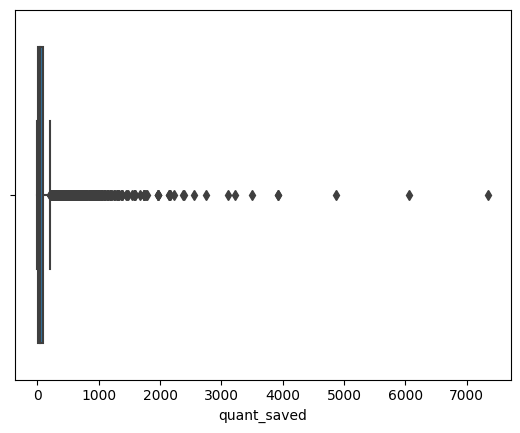

In [ ]:
import seaborn as sns
sns.boxplot(data = df, x=df["quant_saved"])

In [ ]:
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
iqr = q3 - q1

print(f"Q1 - {q1}")
print(f"Q3 - {q3}")
print(f"IQR - {iqr}")

lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr

print(f"Lower_whisker - {lower_whisker}")
print(f"Upper_whisker - {upper_whisker}")

new_df = df[df["quant_saved"] < upper_whisker]

Q1 - 2.284
Q3 - 86.514
IQR - 84.22999999999999
Lower_whisker - -124.06099999999998
Upper_whisker - 212.85899999999998


here, we can say that anyone who saved roughly more than 213 is an outlier in this data.

we remove the outlier and saved in new_df. lets find mean,median and mode for this.

In [ ]:
allsavings = new_df["quant_saved"].tolist()

print(f"mean - {statistics.mean(allsavings)}")
print(f"median - {statistics.median(allsavings)}")
print(f"mode - {statistics.mode(allsavings)}")
print(f"SD - {statistics.stdev(allsavings)}")

fig = ff.create_distplot([new_df["quant_saved"].tolist()],["Savings"], show_hist = False)
fig.show()

mean - 46.20051938981879
median - 36.0475
mode - 0.0
SD - 50.866871917288634


mean is much more close to median, and mode still remian 0.

SD is also reduced from before, but still we dont have normal distibution.

now to make is normal , we can simply draw random samples.

In [ ]:
import random

samplemeanlist = []
for i in range(1000):
  templist = []
  for j in range(100):
    templist.append(random.choice(allsavings))
  samplemeanlist.append(statistics.mean(templist))

mean_sampling = statistics.mean(samplemeanlist)

fig = ff.create_distplot([samplemeanlist],["Saving (sampling)"], show_hist = False)
fig.add_trace(go.Scatter(x=[mean_sampling,mean_sampling], y=[0,0.1], mode="lines", name = "MEAN"))
fig.show()

In [ ]:
print(f"SD of the sampling data - {statistics.stdev(samplemeanlist)}")

SD of the sampling data - 11.54290714125307


In [ ]:
print(f"mean of raw data - {statistics.mean(allsavings)}")
print(f"mean of sampling data - {mean_sampling}")

mean of raw data - 46.20051938981879
mean of sampling data - 45.84535122942216


its exactly the same.
lets find the correlation between the age and the savings with the new data from which we removed the outlier.  

In [ ]:
import numpy as np

temp_df = new_df[new_df.age != 0]

age = temp_df["age"].tolist()
savings = temp_df["quant_saved"].tolist()

correlation = np.corrcoef(age,savings)
print(f"correlation between age & saving is - {correlation[0,1]}")

correlation between age & saving is - 0.08561544120342092


In [ ]:
#other way
new_corr = temp_df.corr()
new_corr

quant_saved    female  highschool_completed   rem_any  \
quant_saved              1.000000 -0.015448              0.008105  0.035264   
female                  -0.015448  1.000000              0.064002  0.053386   
highschool_completed     0.008105  0.064002              1.000000  0.124615   
rem_any                  0.035264  0.053386              0.124615  1.000000   
wealthy                  0.017022  0.116991              0.409571  0.264063   
age                      0.085615  0.002845              0.029016  0.027267   

                       wealthy       age  
quant_saved           0.017022  0.085615  
female                0.116991  0.002845  
highschool_completed  0.409571  0.029016  
rem_any               0.264063  0.027267  
wealthy               1.000000  0.072833  
age                   0.072833  1.000000

correlation is 0.085, which is not significiant.

does reminder have any impact on the savings of the people?how can we achieve this statistically?

with the z-test. we will take a sample from the people who were given reminder and see if that sample fits with the population of people who were not given reminders. it it fits well, we can say that the reminders had no significant effect.

lets filter the data of pople who were given notiifcation and those who were not given notification.


In [ ]:
reminded_df = new_df.loc[new_df["rem_any"] == 1]
notreminded_df = new_df.loc[new_df["rem_any"] == 0]

print(reminded_df.head())
print(notreminded_df.head())

   quant_saved  female  highschool_completed  rem_any  wealthy   age
0      13.0908       1                     0        1        0  28.0
1      39.2724       0                     1        1        1   0.0
3      58.9086       1                     1        1        1   0.0
4      78.5448       1                     1        1        1   0.0
5      39.2724       1                     1        1        1  43.0
    quant_saved  female  highschool_completed  rem_any  wealthy   age
11      39.2724       1                     1        0        1  26.0
12      58.9086       1                     1        0        1   0.0
14      78.5448       1                     1        0        0  32.0
31       2.2840       1                     1        0        1  29.0
34       2.2840       1                     1        0        1  28.0


now lets plot the distribution graph for the people who were not remindede to save and see if it follows a normal distribution.

In [ ]:
fig = ff.create_distplot([notreminded_df["quant_saved"].tolist()],["Savings (Not Reminded)"], show_hist = False)
fig.show()

this is not normal distribution, we will use this sampling data in our z-test.

In [ ]:
notremindedsavings = notreminded_df["quant_saved"].tolist()

samplingmeanlist_notreminded = []

for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(notremindedsavings))
  samplingmeanlist_notreminded.append(statistics.mean(temp_list))

meansamplingnotreminded = statistics.mean(samplingmeanlist_notreminded)
SDsamplingnotreminded = statistics.stdev(samplingmeanlist_notreminded)

print(f"mean of sampling not reminded - {meansamplingnotreminded}")
print(f"SD of sampling not reminded - {SDsamplingnotreminded}")

fig=ff.create_distplot([samplingmeanlist_notreminded],["Saving(sampling)"],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling,mean_sampling], y=[0,0.1], mode = "lines", name = "MEAN"))
fig.show()

mean of sampling not reminded - 43.74237941957848
SD of sampling not reminded - 5.238266631736544


now we have resemblance of a normal distribution and we also have the mean and SD of the sampling data for the people who were mot notified to save.

now, assuming that we strated notifying pople to see if there was an effect in poeple's saving. lets see how it turned out.

lets calcilate the first,second and third SD.

In [ ]:
first_sd_start, first_sd_end = meansamplingnotreminded - SDsamplingnotreminded, meansamplingnotreminded + SDsamplingnotreminded
print(f"First(start) - {first_sd_start} and Fisrt(end) - {first_sd_end}")

second_sd_start, second_sd_end = meansamplingnotreminded - (2 * SDsamplingnotreminded), meansamplingnotreminded + (2 * SDsamplingnotreminded)
print(f"Second(start) - {second_sd_start} and Second(end) - {second_sd_end}")

third_sd_start, third_sd_end = meansamplingnotreminded - (3 * SDsamplingnotreminded), meansamplingnotreminded + (3 * SDsamplingnotreminded)
print(f"Third(start) - {third_sd_start} and Third(end) - {third_sd_end}")

First(start) - 38.50411278784193 and Fisrt(end) - 48.98064605131502
Second(start) - 33.26584615610539 and Second(end) - 54.21891268305156
Third(start) - 28.027579524368843 and Third(end) - 59.45717931478811


lets do the z-test. take a sampling distribution of the reople who were reminded for saving.

In [ ]:
remindedsavings = reminded_df["quant_saved"].tolist()

samplingmeanlist_reminded = []

for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(remindedsavings))
  samplingmeanlist_reminded.append(statistics.mean(temp_list))

meansamplingreminded = statistics.mean(samplingmeanlist_reminded)
SDsamplingreminded = statistics.stdev(samplingmeanlist_reminded)

print(f"mean of sampling reminded - {meansamplingreminded}")
print(f"SD of sampling reminded - {SDsamplingreminded}")

fig=ff.create_distplot([samplingmeanlist_reminded],["Saving(sampling)"],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling,mean_sampling], y=[0,0.1], mode = "lines", name = "MEAN"))
fig.show()

mean of sampling reminded - 47.90687224592662
SD of sampling reminded - 5.213846119488513


lets check how did reminders impact savings

In [ ]:
zscore = (meansamplingreminded - meansamplingnotreminded) / SDsamplingnotreminded
print(f"z-score is - {zscore}")

z-score is - 0.7950135262525895


**Conclusion**

there is not much difference between the people who got reminded v/s pople who were not reminded of saving.

with z-score, we confirmed that there is not much difference. The z-score is arount 0.8. it is only when the z-score is greater than 2 that we consider the change as significant.

we also saw that there was no direct correlation between the age of the pople and the money that they save.

